In [ ]:
!pip install numpy
!pip install librosa 
!pip install noisereduce
!pip install matplotlib

  Created wheel for noisereduce: filename=noisereduce-1.1.0-cp37-none-any.whl size=7610 sha256=f65a106c4a643fde8d16e60e114efb120d23ca33f5e92552771c7d10dc739218
  Stored in directory: /root/.cache/pip/wheels/a6/2c/70/f9ccb41280dcfbe3eaeb7930f913dd85394617f3d3136f29cc
Successfully built noisereduce


In [ ]:
import numpy as np
import librosa 
import librosa.display
import noisereduce as nr
import matplotlib.pyplot as plt

In [ ]:
# Get git repo 
!git clone https://github.com/Rishub-Handa/gia_noise.git

Cloning into 'gia_noise'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 5), reused 19 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


In [ ]:
filename = '/content/gia_noise/data/friendly/05_04_Rithika_roomates_5_NOISY.m4a'

audio_data, sampling_rate = librosa.load(filename)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


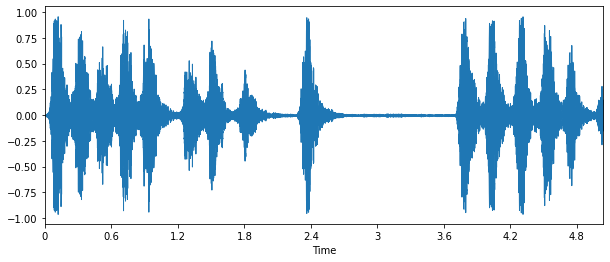

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.waveplot(audio_data, sr=sampling_rate)
plt.show()

In [ ]:
# Load signal and noise 

signal_fn = '/content/gia_noise/data/excited/05_05_excited_1.m4a'
noise_fn = '/content/gia_noise/data/excited/05_05_excited_NOISE.m4a'


signal, sr_signal = librosa.load(signal_fn)
noise, sr_noise = librosa.load(noise_fn)
noise = noise[int(len(noise)/2):]

len(noise)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


55272

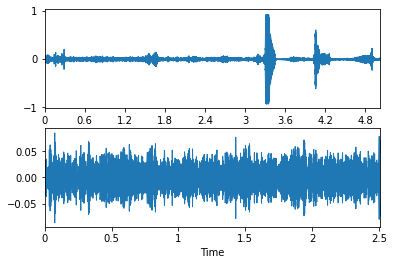

In [ ]:
fig, ax = plt.subplots(2)

librosa.display.waveplot(signal, sr=sr_signal, ax=ax[0])
librosa.display.waveplot(noise, sr=sr_noise, ax=ax[1])

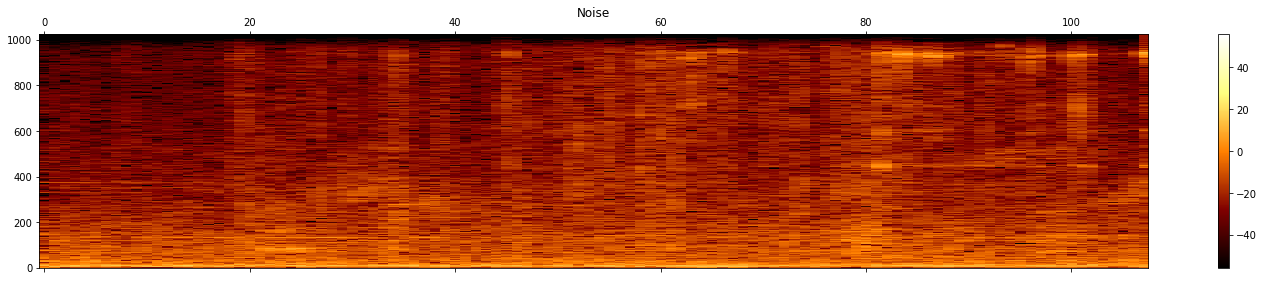

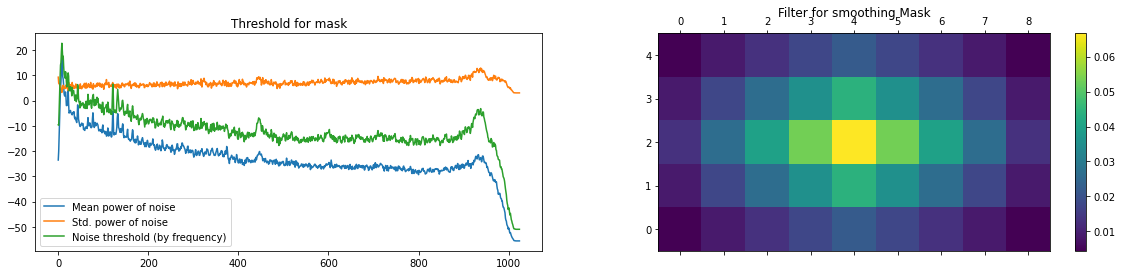

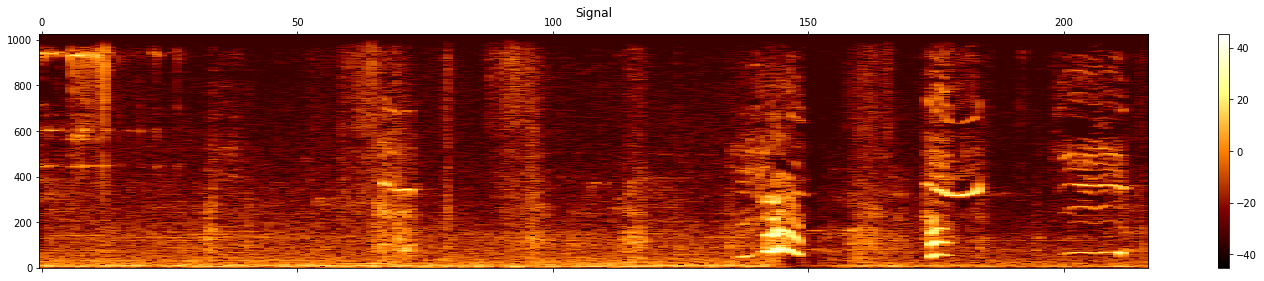

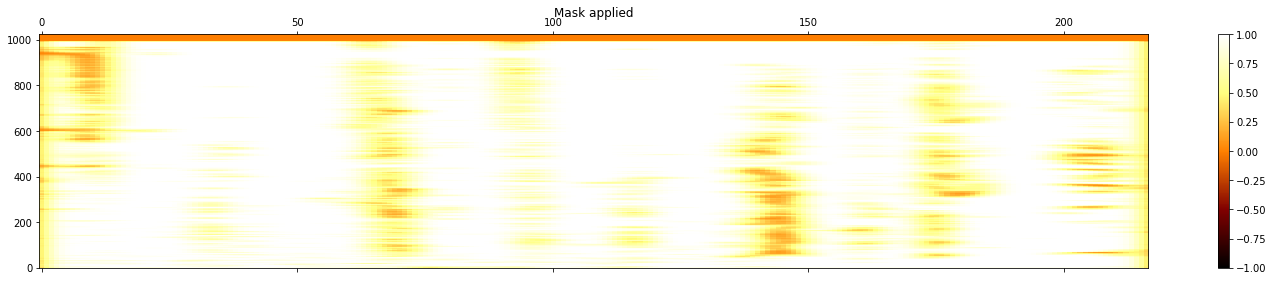

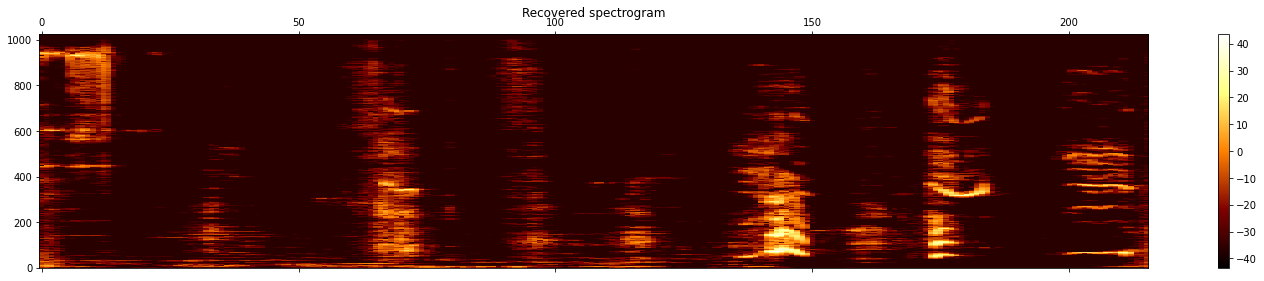

In [ ]:
reduced_noise = nr.reduce_noise(audio_clip=signal,
noise_clip=noise, verbose=True)

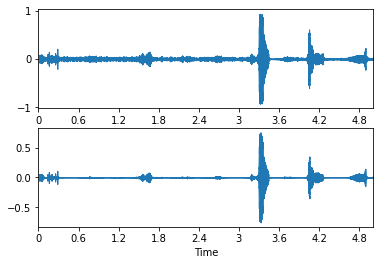

In [ ]:
fig, ax = plt.subplots(2)

librosa.display.waveplot(signal, sr=sr_signal, ax=ax[0])
librosa.display.waveplot(reduced_noise, sr=sr_noise, ax=ax[1])

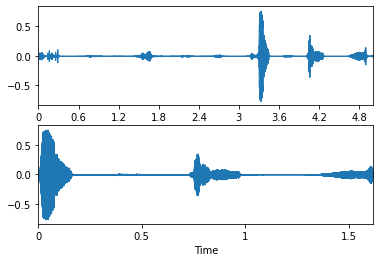

In [ ]:
trimmed, index = librosa.effects.trim(reduced_noise, top_db=20, frame_length=512, hop_length=64)

fig, ax = plt.subplots(2)

librosa.display.waveplot(reduced_noise, sr=sr_signal, ax=ax[0])
librosa.display.waveplot(trimmed, sr=sr_noise, ax=ax[1])

In [ ]:

features = []
    
stft = np.abs(librosa.stft(trimmed))

mfcc = np.mean(librosa.feature.mfcc(y=trimmed, sr=sr_signal, n_mfcc=40).T,axis=0)
features.extend(mfcc) # 40 features 

chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr_signal).T,axis=0)
features.extend(chroma) # 12 features

mel = np.mean(librosa.feature.melspectrogram(trimmed, sr=sr_signal).T,axis=0)
features.extend(mel) # 128 features 

contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr_signal).T,axis=0)
features.extend(contrast) # 7 features 

# 187 features total 
features_arr = np.array(features)

features_arr



In [ ]:
!cd /content/gia_noise/
!ls
!pwd
!git status ./gia_noise/

gia_noise  sample_data
/content
fatal: not a git repository (or any of the parent directories): .git
